(3000, 11)
First five rows of the Wage dataset:
   year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  


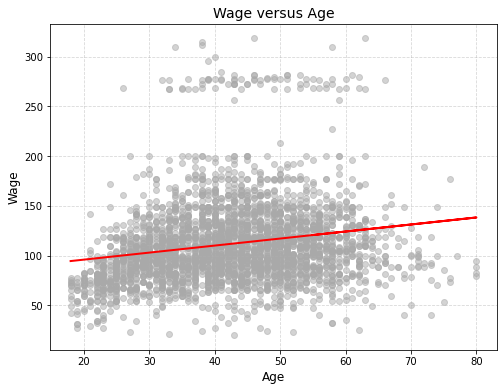

In [11]:
####### example for lecture introduction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# ---------------------------
# 1. Load the Wage Dataset
# ---------------------------
# Load the Wage dataset from ISLR's GitHub repository
Wage = pd.read_csv('Wage.csv')
print(Wage.shape)
# Display the first few rows
print("First five rows of the Wage dataset:")
print(Wage.head())



#############################
## 3. Linear Model
############################
age = sm.add_constant(Wage['age'])
wage=Wage['wage']
slModel=sm.OLS(wage, age).fit()

# ---------------------------
# 2. Plotting Wage versus Age
# ---------------------------

# Plot Wage versus Age
plt.figure(figsize=(8,6))
plt.scatter(Wage['age'], Wage['wage'], color='darkgrey', alpha=0.5)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Wage', fontsize=12)
plt.title('Wage versus Age', fontsize=14)
plt.plot(Wage['age'], slModel.predict(age), color='red', label='Fitted Line', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

First five rows of the Wage dataset:
   year  age            maritl      race        education              region  \
0  2006   18  1. Never Married  1. White     1. < HS Grad  2. Middle Atlantic   
1  2004   24  1. Never Married  1. White  4. College Grad  2. Middle Atlantic   
2  2003   45        2. Married  1. White  3. Some College  2. Middle Atlantic   
3  2003   43        2. Married  3. Asian  4. College Grad  2. Middle Atlantic   
4  2005   50       4. Divorced  1. White       2. HS Grad  2. Middle Atlantic   

         jobclass          health health_ins   logwage        wage  
0   1. Industrial       1. <=Good      2. No  4.318063   75.043154  
1  2. Information  2. >=Very Good      2. No  4.255273   70.476020  
2   1. Industrial       1. <=Good     1. Yes  4.875061  130.982177  
3  2. Information  2. >=Very Good     1. Yes  5.041393  154.685293  
4  2. Information       1. <=Good     1. Yes  4.318063   75.043154  


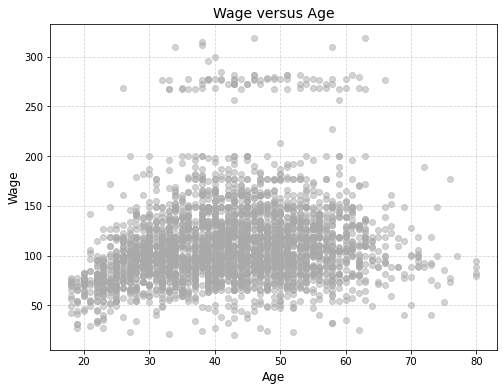


Summary of Degree-4 Polynomial Regression (Raw Terms):
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           2.77e-57
Time:                        10:40:02   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

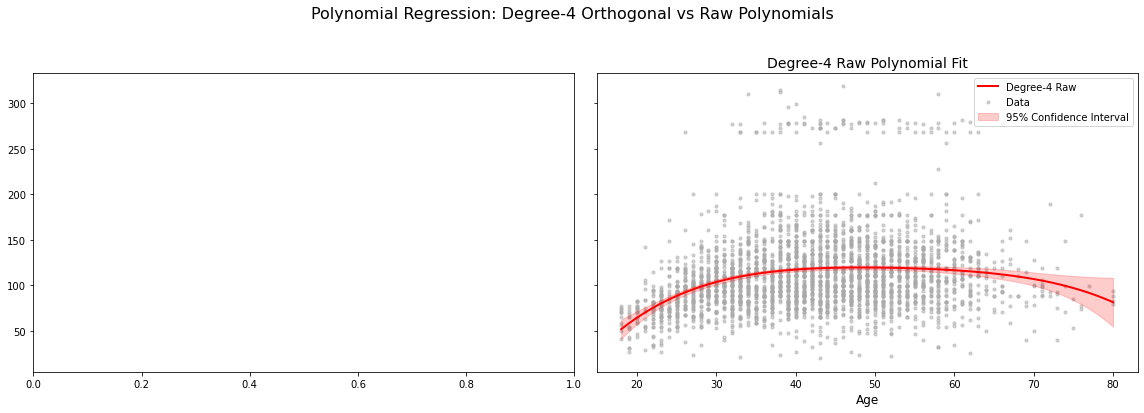

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

# ---------------------------
# 1. Load the Wage Dataset
# ---------------------------

# Load the Wage dataset from ISLR's GitHub repository
Wage = pd.read_csv('Wage.csv')

# Display the first few rows
print("First five rows of the Wage dataset:")
print(Wage.head())

# ---------------------------
# 2. Plotting Wage versus Age
# ---------------------------

# Plot Wage versus Age
plt.figure(figsize=(8,6))
plt.scatter(Wage['age'], Wage['wage'], color='darkgrey', alpha=0.5)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Wage', fontsize=12)
plt.title('Wage versus Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ---------------------------
# 3. Polynomial Regression and Step Functions
# ---------------------------


# ---------------------------
# b. Fit Degree-4 Polynomial (Raw Terms)
# ---------------------------

# Fit a degree-4 polynomial using raw polynomial terms
fit_poly4_raw = smf.ols('wage ~ age + I(age**2) + I(age**3) + I(age**4)', data=Wage).fit()

# Display the summary of the fitted model
print("\nSummary of Degree-4 Polynomial Regression (Raw Terms):")
print(fit_poly4_raw.summary())

# ---------------------------
# c. Compact Polynomial Regression with cbind-like Method
# ---------------------------

# Fit a degree-4 polynomial using a compact formula (equivalent to cbind in R)
fit_poly4_compact = smf.ols('wage ~ age + I(age**2) + I(age**3) + I(age**4)', data=Wage).fit()

# Display the summary of the fitted model
print("\nSummary of Degree-4 Polynomial Regression (Compact Method):")
print(fit_poly4_compact.summary())


# ---------------------------
# e. Predictions and Confidence Bands for Degree-4 Polynomial (Raw)
# ---------------------------

# Predict using the degree-4 raw polynomial model
preds_poly4_raw = fit_poly4_raw.get_prediction(pred_data)
preds_summary_poly4_raw = preds_poly4_raw.summary_frame()

# Confidence bands
ci_upper_poly4_raw = preds_summary_poly4_raw['mean_ci_upper']
ci_lower_poly4_raw = preds_summary_poly4_raw['mean_ci_lower']
pred_fit_poly4_raw = preds_summary_poly4_raw['mean']

# ---------------------------
# f. Plotting Degree-4 Polynomial Fits with Confidence Bands
# ---------------------------

# Create subplots for Degree-4 Orthogonal and Raw Polynomial Fits
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)


# Plot for Degree-4 Raw Polynomial
axes[1].scatter(Wage['age'], Wage['wage'], color='darkgrey', s=10, alpha=0.5, label='Data')
axes[1].plot(age_grid, pred_fit_poly4_raw, color='red', linewidth=2, label='Degree-4 Raw')
axes[1].fill_between(age_grid, ci_lower_poly4_raw, ci_upper_poly4_raw, color='red', alpha=0.2, label='95% Confidence Interval')
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_title('Degree-4 Raw Polynomial Fit', fontsize=14)
axes[1].legend()

# Add an overall title
plt.suptitle('Polynomial Regression: Degree-4 Orthogonal vs Raw Polynomials', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()

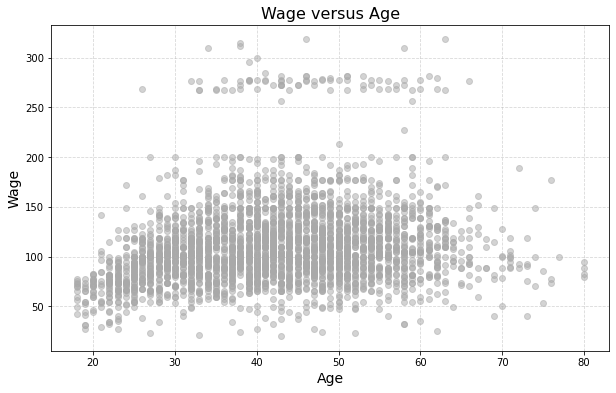


Summary of Polynomial Logistic Regression Model (Degree 4):
                 Generalized Linear Model Regression Results                  
Dep. Variable:            wage_binary   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.61
Date:                Mon, 14 Oct 2024   Deviance:                       701.22
Time:                        16:12:44   Pearson chi2:                 3.70e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

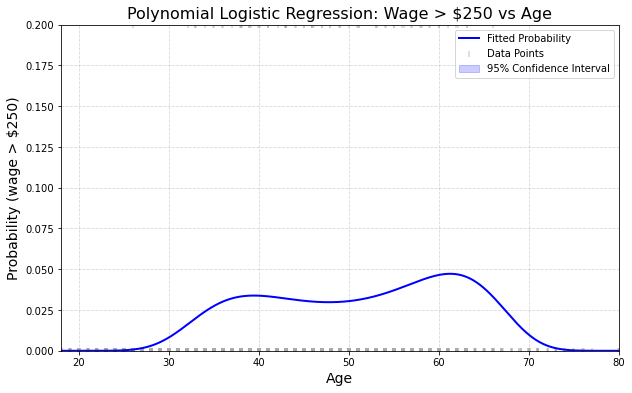

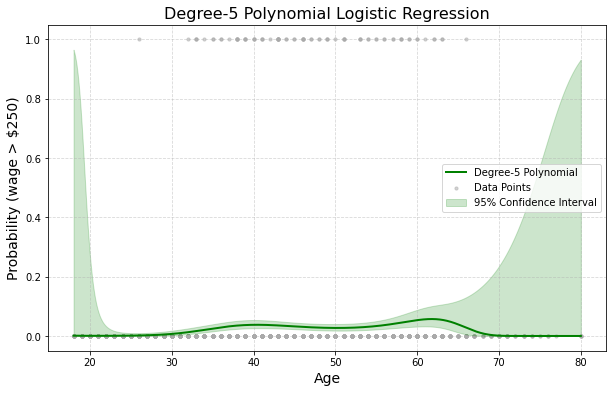


Summary of Degree-5 Polynomial Logistic Regression:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            wage_binary   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2994
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -349.43
Date:                Mon, 14 Oct 2024   Deviance:                       698.87
Time:                        16:12:44   Pearson chi2:                 3.04e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

In [10]:
####### polynomial logistic regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm


import numpy as np

def poly(x, degree):
    return np.column_stack([x**i for i in range(1, degree + 1)])


# ---------------------------
# 1. Load the Wage Dataset
# ---------------------------

# Load the Wage dataset from ISLR's GitHub repository
Wage = pd.read_csv('Wage.csv')

# ---------------------------
# 2. Plotting Wage versus Age
# ---------------------------

# Define the range for age grid based on the data
agelims = Wage['age'].min(), Wage['age'].max()
age_grid = np.linspace(agelims[0], agelims[1], 1000)

# Plot Wage versus Age
plt.figure(figsize=(10, 6))
plt.scatter(Wage['age'], Wage['wage'], color='darkgrey', alpha=0.5)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Wage', fontsize=14)
plt.title('Wage versus Age', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ---------------------------
# 3. Fit a Polynomial Logistic Regression Model
# ---------------------------

# Define the threshold for classification
threshold = 250  # Adjust based on the data

# Create a binary target variable: 1 if wage > threshold, else 0
Wage['wage_binary'] = (Wage['wage'] > threshold).astype(int)

# Fit a 4th-degree polynomial logistic regression model 
fit = smf.glm(formula='wage_binary ~ poly(age,4)', data=Wage, family=sm.families.Binomial()).fit()

# Display the summary of the fitted model
print("\nSummary of Polynomial Logistic Regression Model (Degree 4):")
print(fit.summary())

# ---------------------------
# 4. Generate Predictions and Confidence Intervals
# ---------------------------

# Generate predictions on the age grid
preds = fit.get_prediction(pd.DataFrame({'age': age_grid}))
preds_summary = preds.summary_frame()

# Extract predicted probabilities
pfit = preds_summary['mean']

# Extract confidence intervals on the logit scale
ci_upper_logit = preds_summary['mean_ci_upper']
ci_lower_logit = preds_summary['mean_ci_lower']

# Convert logit confidence intervals to probability scale using the logistic function
se_bands_logit = np.vstack((ci_upper_logit, ci_lower_logit)).T
se_bands = np.exp(se_bands_logit) / (1 + np.exp(se_bands_logit))

# ---------------------------
# 5. Plot the Fitted Probabilities with Confidence Bands
# ---------------------------

plt.figure(figsize=(10, 6))
plt.xlim(agelims)
plt.ylim(0, 0.2)  # Adjust based on the threshold and data

# Scatter plot of observations with jittered x-values
plt.scatter(Wage['age'] + np.random.uniform(-0.1, 0.1, size=Wage.shape[0]),
            Wage['wage_binary'] / 5,  # Scaling to fit y-axis limits
            marker='|',
            color='darkgrey',
            alpha=0.5,
            label='Data Points')

# Plot the fitted probability curve
plt.plot(age_grid, pfit, color='blue', linewidth=2, label='Fitted Probability')

# Plot the confidence bands
plt.fill_between(age_grid, se_bands[:,1], se_bands[:,0],
                 color='blue', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel('Age', fontsize=14)
plt.ylabel('Probability (wage > $250)', fontsize=14)
plt.title('Polynomial Logistic Regression: Wage > $250 vs Age', fontsize=16)

# Add legend
plt.legend()

# Add grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


fit_degree5 = smf.glm(formula='wage_binary ~ poly(age, 5)', data=Wage, family=sm.families.Binomial()).fit()


# ---------------------------
# 7. Plotting the Degree-5 Polynomial Fit with Confidence Bands
# ---------------------------

# Predict using the degree-5 polynomial model
preds_poly5 = fit_degree5.get_prediction(pd.DataFrame({'age': age_grid}))
preds_summary_poly5 = preds_poly5.summary_frame()

# Confidence bands
ci_upper_poly5 = preds_summary_poly5['mean_ci_upper']
ci_lower_poly5 = preds_summary_poly5['mean_ci_lower']
pred_fit_poly5 = preds_summary_poly5['mean']

# Plot the Degree-5 Polynomial Fit
plt.figure(figsize=(10, 6))
plt.scatter(Wage['age'], Wage['wage_binary'], color='darkgrey', s=10, alpha=0.5, label='Data Points')
plt.plot(age_grid, pred_fit_poly5, color='green', linewidth=2, label='Degree-5 Polynomial')
plt.fill_between(age_grid, ci_lower_poly5, ci_upper_poly5, color='green', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Probability (wage > $250)', fontsize=14)
plt.title('Degree-5 Polynomial Logistic Regression', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print coefficients summary for Degree-5 polynomial
print("\nSummary of Degree-5 Polynomial Logistic Regression:")
print(fit_degree5.summary())

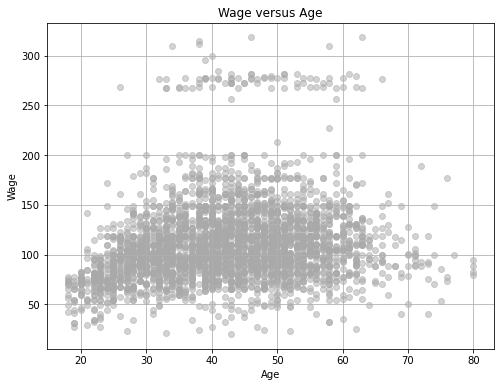

Frequency table for age cut into 4 bins:
(33.5, 49.0]      1399
(49.0, 64.5]       779
(17.938, 33.5]     750
(64.5, 80.0]        72
Name: age_cut_4, dtype: int64

Linear Regression Coefficients (age cut into 4 bins):
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                               94.1584      1.476     63.790      0.000      91.264      97.053
C(age_cut_4)[T.Interval(33.5, 49.0, closed='right')]    24.0535      1.829     13.148      0.000      20.466      27.641
C(age_cut_4)[T.Interval(49.0, 64.5, closed='right')]    23.6646      2.068     11.443      0.000      19.610      27.719
C(age_cut_4)[T.Interval(64.5, 80.0, closed='right')]     7.6406      4.987      1.532      0.126      -2.139      17.420


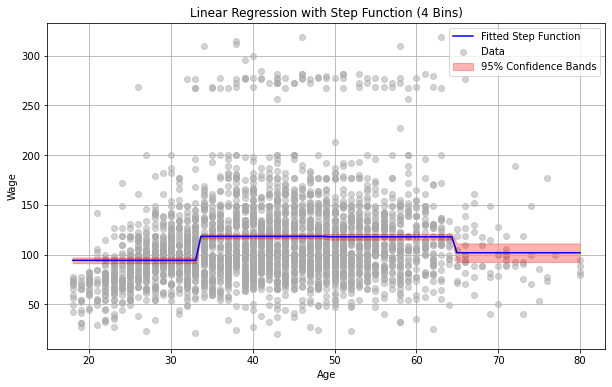

Frequency table for age cut into 8 bins:
(41.25, 49.0]      728
(33.5, 41.25]      671
(25.75, 33.5]      519
(49.0, 56.75]      503
(56.75, 64.5]      276
(17.938, 25.75]    231
(64.5, 72.25]       54
(72.25, 80.0]       18
Name: age_cut_8, dtype: int64

Linear Regression Coefficients (age cut into 8 bins):
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                76.2818      2.630     29.007      0.000      71.125      81.438
C(age_cut_8)[T.Interval(25.75, 33.5, closed='right')]    25.8333      3.161      8.172      0.000      19.635      32.032
C(age_cut_8)[T.Interval(33.5, 41.25, closed='right')]    40.2257      3.049     13.193      0.000      34.247      46.204
C(age_cut_8)[T.Interval(41.25, 49.0, closed='right')]    43.5011      3.018     

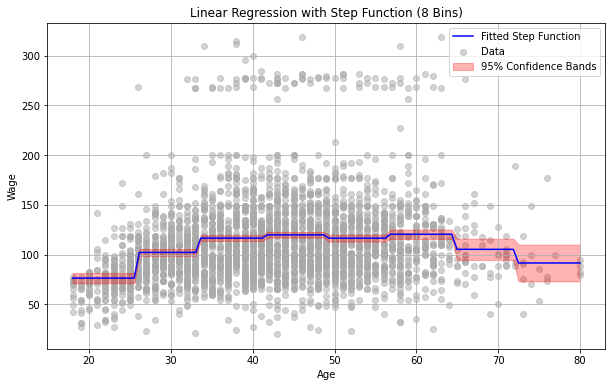

                 Generalized Linear Model Regression Results                  
Dep. Variable:              high_wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -354.85
Date:                Mon, 14 Oct 2024   Deviance:                       709.69
Time:                        16:44:37   Pearson chi2:                 3.00e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

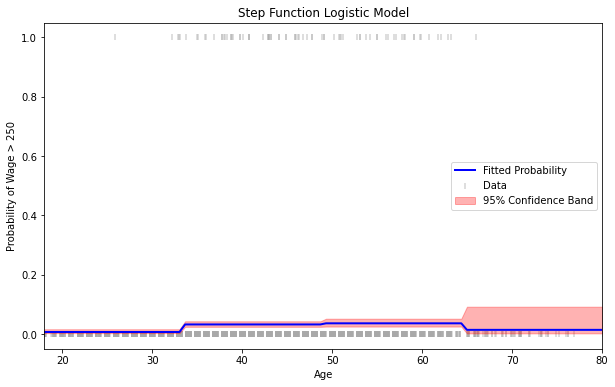

                 Generalized Linear Model Regression Results                  
Dep. Variable:              high_wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2992
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -351.40
Date:                Mon, 14 Oct 2024   Deviance:                       702.80
Time:                        16:44:38   Pearson chi2:                 2.75e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

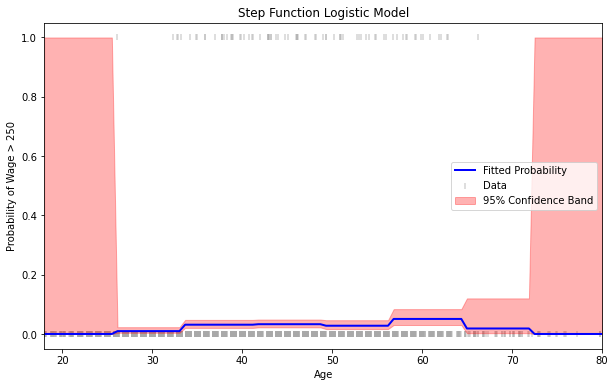

In [27]:
######### step function and logistic regression
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# ---------------------------
# 1. Load the Wage Dataset
# ---------------------------

# Load the Wage dataset from ISLR's GitHub repository
Wage = pd.read_csv('Wage.csv')
df=Wage
# Create binary outcome
df['high_wage'] = (df['wage'] > 250).astype(int)

# Create age grids
age_min, age_max = df['age'].min(), df['age'].max()
age_grid = np.linspace(age_min, age_max, 100)

# ----------------------------------
# 1. Plot Wage vs Age
# ----------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['wage'], color='darkgrey', alpha=0.5)
plt.title('Wage versus Age')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.grid(True)
plt.show()

# ----------------------------------
# 2. Linear Regression with 4 Bins
# ----------------------------------
df['age_cut_4'] = pd.cut(df['age'], bins=4)
print("Frequency table for age cut into 4 bins:")
print(df['age_cut_4'].value_counts())

model_lm_4 = smf.ols('wage ~ C(age_cut_4)', data=df).fit()
print("\nLinear Regression Coefficients (age cut into 4 bins):")
print(model_lm_4.summary().tables[1])

# Prediction
pred_df_4 = pd.DataFrame({'age': age_grid})
pred_df_4['age_cut_4'] = pd.cut(pred_df_4['age'], bins=4)

predictions_4 = model_lm_4.get_prediction(pred_df_4)
pred_summary_4 = predictions_4.summary_frame(alpha=0.05)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['wage'], color='darkgrey', alpha=0.5, label='Data')
plt.plot(age_grid, pred_summary_4['mean'], color='blue', label='Fitted Step Function')
plt.fill_between(age_grid, pred_summary_4['mean_ci_lower'], pred_summary_4['mean_ci_upper'],
                 color='red', alpha=0.3, label='95% Confidence Bands')
plt.title('Linear Regression with Step Function (4 Bins)')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------
# 3. Linear Regression with 8 Bins
# ----------------------------------
df['age_cut_8'] = pd.cut(df['age'], bins=8)
print("Frequency table for age cut into 8 bins:")
print(df['age_cut_8'].value_counts())

model_lm_8 = smf.ols('wage ~ C(age_cut_8)', data=df).fit()
print("\nLinear Regression Coefficients (age cut into 8 bins):")
print(model_lm_8.summary().tables[1])

# Prediction
pred_df_8 = pd.DataFrame({'age': age_grid})
pred_df_8['age_cut_8'] = pd.cut(pred_df_8['age'], bins=8)

predictions_8 = model_lm_8.get_prediction(pred_df_8)
pred_summary_8 = predictions_8.summary_frame(alpha=0.05)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['wage'], color='darkgrey', alpha=0.5, label='Data')
plt.plot(age_grid, pred_summary_8['mean'], color='blue', label='Fitted Step Function')
plt.fill_between(age_grid, pred_summary_8['mean_ci_lower'], pred_summary_8['mean_ci_upper'],
                 color='red', alpha=0.3, label='95% Confidence Bands')
plt.title('Linear Regression with Step Function (8 Bins)')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend()
plt.grid(True)
plt.show()



#############
#4. Logistic regression with 4 Bins
##

# Load the Wage dataset from ISLR's GitHub repository
wage = pd.read_csv('Wage.csv')

# 3. Fit a step function logistic regression model
# Create a binary target variable: 1 if wage > 250, else 0
wage['high_wage'] = (wage['wage'] > 250).astype(int)

# Define the number of bins for the step function
num_bins = 4
wage['age_bin'] = pd.cut(wage['age'], bins=num_bins)

# Fit logistic regression using statsmodels with categorical age bins
model = smf.glm(
    formula='high_wage ~ C(age_bin)',
    data=wage,
    family=sm.families.Binomial()
).fit()

print(model.summary())

# 4. Make predictions on a grid of age values
# Define age limits
agelims = [wage['age'].min(), wage['age'].max()]
age_grid = np.linspace(agelims[0], agelims[1], 100)

# Create a DataFrame for prediction by cutting the age_grid into the same bins
age_bins = pd.cut(age_grid, bins=num_bins)
pred_data = pd.DataFrame({'age_bin': age_bins})

# Get predictions on the logit scale with standard errors
predictions = model.get_prediction(pred_data)
pred_summary = predictions.summary_frame()

# Calculate pfit and confidence bands on the probability scale
pfit = pred_summary['mean']  # Predicted probabilities
se_bands_logit_upper = pred_summary['mean_ci_upper']
se_bands_logit_lower = pred_summary['mean_ci_lower']

# Alternatively, calculate confidence intervals manually on the logit scale
# and then transform them to the probability scale
# However, statsmodels already provides the confidence intervals on the probability scale

# 5. Plot the confidence bands
plt.figure(figsize=(10, 6))

# Plot the binary outcome with some jitter
# Adding jitter by adding small random noise to the age
jitter_strength = 0.3
jittered_age = wage['age'] + np.random.uniform(-jitter_strength, jitter_strength, size=wage.shape[0])
plt.scatter(jittered_age, wage['high_wage'], 
            color='darkgrey', alpha=0.5, marker='|', label='Data')

# Plot the predicted probabilities
plt.plot(age_grid, pfit, color='blue', lw=2, label='Fitted Probability')

# Plot the confidence bands
plt.fill_between(age_grid, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], 
                 color='red', alpha=0.3, label='95% Confidence Band')

# Customize the plot
plt.xlim(agelims)
plt.ylim(-0.05, 1.05)
plt.xlabel('Age')
plt.ylabel('Probability of Wage > 250')
plt.title('Step Function Logistic Model')
plt.legend()
plt.show()






####
# Logistci regression with Step functions 8bins
####
# Load the Wage dataset from ISLR's GitHub repository
wage = pd.read_csv('Wage.csv')

# 3. Fit a step function logistic regression model
# Create a binary target variable: 1 if wage > 250, else 0
wage['high_wage'] = (wage['wage'] > 250).astype(int)

# Define the number of bins for the step function
num_bins = 8
wage['age_bin'] = pd.cut(wage['age'], bins=num_bins)

# Fit logistic regression using statsmodels with categorical age bins
model = smf.glm(
    formula='high_wage ~ C(age_bin)',
    data=wage,
    family=sm.families.Binomial()
).fit()

print(model.summary())

# 4. Make predictions on a grid of age values
# Define age limits
agelims = [wage['age'].min(), wage['age'].max()]
age_grid = np.linspace(agelims[0], agelims[1], 100)

# Create a DataFrame for prediction by cutting the age_grid into the same bins
age_bins = pd.cut(age_grid, bins=num_bins)
pred_data = pd.DataFrame({'age_bin': age_bins})

# Get predictions on the logit scale with standard errors
predictions = model.get_prediction(pred_data)
pred_summary = predictions.summary_frame()

# Calculate pfit and confidence bands on the probability scale
pfit = pred_summary['mean']  # Predicted probabilities
se_bands_logit_upper = pred_summary['mean_ci_upper']
se_bands_logit_lower = pred_summary['mean_ci_lower']

# Alternatively, calculate confidence intervals manually on the logit scale
# and then transform them to the probability scale
# However, statsmodels already provides the confidence intervals on the probability scale

# 5. Plot the confidence bands
plt.figure(figsize=(10, 6))

# Plot the binary outcome with some jitter
# Adding jitter by adding small random noise to the age
jitter_strength = 0.3
jittered_age = wage['age'] + np.random.uniform(-jitter_strength, jitter_strength, size=wage.shape[0])
plt.scatter(jittered_age, wage['high_wage'], 
            color='darkgrey', alpha=0.5, marker='|', label='Data')

# Plot the predicted probabilities
plt.plot(age_grid, pfit, color='blue', lw=2, label='Fitted Probability')

# Plot the confidence bands
plt.fill_between(age_grid, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], 
                 color='red', alpha=0.3, label='95% Confidence Band')

# Customize the plot
plt.xlim(agelims)
plt.ylim(-0.05, 1.05)
plt.xlabel('Age')
plt.ylabel('Probability of Wage > 250')
plt.title('Step Function Logistic Model')
plt.legend()
plt.show()


